In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize

In [20]:
train = pd.read_csv('data/KDDTrain+.txt')
train = train.iloc[:,0:42]
train.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']


In [21]:
test = pd.read_csv('data/KDDtest+.txt')
test = test.iloc[:,0:42]
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                    ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                  'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']

In [22]:
train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,42,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,47,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,21,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,21,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,47,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,47,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,47,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,49,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,47,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,47,1,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [23]:
test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)
test.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,47,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,2,1,17,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
2,0,2,11,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,0
3,1,1,58,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,0
4,0,1,21,9,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
5,0,1,52,9,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
6,0,1,58,9,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0
7,0,1,21,9,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
8,0,1,16,9,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0
9,0,1,58,9,0,0,0,0,0,0,...,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,0


In [24]:
#Outliers ditection
Q1=train['src_bytes'].quantile(0.25)
Q3=train['src_bytes'].quantile(0.75)
IQR=Q3 - Q1
print(Q3,Q1)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
train = train[train['src_bytes']< Upper_Whisker]
Q1=train['dst_bytes'].quantile(0.25)
Q3=train['dst_bytes'].quantile(0.75)
IQR=Q3 - Q1
print(Q3,Q1)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
train = train[train['dst_bytes']< Upper_Whisker]
#Q1=train['dst_host_srv_count'].quantile(0.25)\n",
#Q3=train['dst_host_srv_count'].quantile(0.75)\n",
#IQR=Q3 - Q1\n",
#print(Q3,Q1)\n",
#Lower_Whisker = Q1-1.5*IQR\n",
#Upper_Whisker = Q3+1.5*IQR\n",
#print(Lower_Whisker, Upper_Whisker)\n",
#train = train[train['dst_host_srv_count']< Upper_Whisker]
train = train.reset_index(drop = True)
#train = normalize(train, norm = 'l2', axis = 0)
  #train = pd.DataFrame(train,columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'\n",
                                   #  ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',\n",
                                 # 'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',\n",
                                    # 'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',\n",
                                   #  'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',\n",
                                     # 'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',\n",
                           # 'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
            # 'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    #  'dst_host_srv_rerror_rate','label'])
train.head()

276.0 0.0
-414.0 690.0
612.0 0.0
-918.0 1530.0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,42,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.0,0.0,0
1,0,1,47,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.0,0.0,1
2,0,1,21,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,1,47,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.0,0.0,0.0,1.0,1.0,1
4,0,1,47,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.0,1.0,1.0,0.0,0.0,1


In [25]:
#Outliers ditection
Q1=test['src_bytes'].quantile(0.25)
Q3=test['src_bytes'].quantile(0.75)
IQR=Q3 - Q1
print(Q3,Q1)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
test = test[test['src_bytes']< Upper_Whisker]
Q1=test['dst_bytes'].quantile(0.25)
Q3=test['dst_bytes'].quantile(0.75)
IQR=Q3 - Q1
print(Q3,Q1)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
test = test[test['dst_bytes']< Upper_Whisker]
#Q1=train['dst_host_srv_count'].quantile(0.25)\n",
#Q3=train['dst_host_srv_count'].quantile(0.75)\n",
#IQR=Q3 - Q1\n",
#print(Q3,Q1)\n",
#Lower_Whisker = Q1-1.5*IQR\n",
#Upper_Whisker = Q3+1.5*IQR\n",
#print(Lower_Whisker, Upper_Whisker)\n",
#train = train[train['dst_host_srv_count']< Upper_Whisker]
test = test.reset_index(drop = True)
test.head()

287.0 0.0
-430.5 717.5
695.0 0.0
-1042.5 1737.5


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,47,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,2,11,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,0
2,1,1,58,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,0
3,0,1,58,9,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0
4,0,1,21,9,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0


In [26]:
x_train = train.iloc[:,0:40]
y_train = train.iloc[:,41]
x_test = test.iloc[:,0:40]
y_test = test.iloc[:,41]

Accuracy: 0.9364350453172205 

                Predicted DOS  Predicted Not DOS
Actual DOS              10597                199
Actual Not DOS            853               4901 

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10796
           1       0.96      0.85      0.90      5754

    accuracy                           0.94     16550
   macro avg       0.94      0.92      0.93     16550
weighted avg       0.94      0.94      0.94     16550



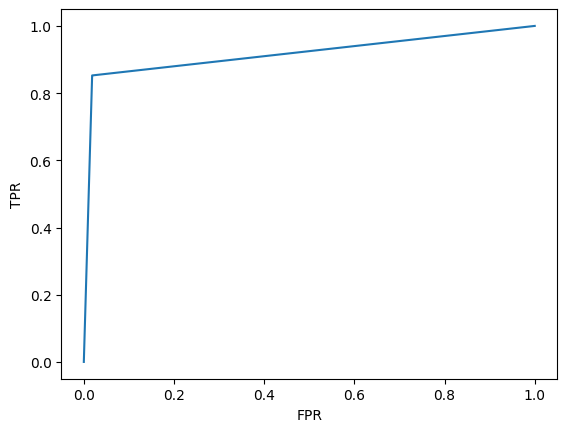

0.917087745586845


In [27]:
#decision tree

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predicted = dt.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.938368580060423 

                Predicted DOS  Predicted Not DOS
Actual DOS              10568                228
Actual Not DOS            792               4962 

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10796
           1       0.96      0.86      0.91      5754

    accuracy                           0.94     16550
   macro avg       0.94      0.92      0.93     16550
weighted avg       0.94      0.94      0.94     16550



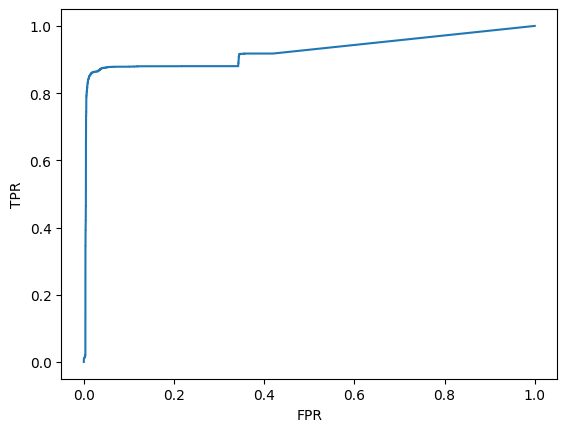

0.9240561650622285


In [28]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = Lr.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)